In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
import skits

# get data

In [3]:
import os
curr_directory = os.getcwd()
datafile = curr_directory + "/data/Food_price_indices_data_jul.csv"
food_data = pd.read_csv(datafile)
food_data.head()

,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index
0,1/1990,108.7,112.3,94.3,106.4,73.0,201.5
1,2/1990,109.9,117.7,91.9,104.0,72.5,207.9
2,3/1990,107.9,119.6,73.6,102.1,74.6,218.0
3,4/1990,114.2,131.0,85.2,105.1,71.8,216.3
4,5/1990,111.2,130.5,70.0,105.3,74.4,207.2


In [4]:
datafile2 = curr_directory + "/data/GLB.Ts+dSST.csv"
temperature_data = pd.read_csv(datafile2)
temperature_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.20,-0.09,-0.15,-0.23,-0.2,-0.22,-0.18,***,***,-0.14,-0.17,-0.19
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.2,-0.21,-0.1,-0.09,-0.1,-0.18,0.04,-0.09,-0.18
2,1882,0.15,0.15,0.04,-0.18,-0.16,-0.25,-0.20,-0.05,-0.09,-0.24,-0.16,-0.24,-0.1,-0.09,0.07,-0.10,-0.17,-0.16
3,1883,-0.31,-0.38,-0.12,-0.17,-0.20,-0.12,-0.08,-0.15,-0.2,-0.14,-0.22,-0.15,-0.19,-0.19,-0.31,-0.16,-0.11,-0.19
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.29,-0.27,-0.29,-0.28,-0.13,-0.38,-0.33,-0.27


# clean the data

In [5]:
from Capstone.cleaning import cleaning

clean_temp_data = cleaning.clean_temperature_data_step1(temperature_data)
clean_temp_data = cleaning.clean_temperature_data_step2(clean_temp_data)

In [6]:
clean_temp_data.dtypes

Date           datetime64[ns]
Temperature           float64
dtype: object

In [7]:
clean_food_data = cleaning.clean_food_data(food_data)

In [8]:
clean_food_data['Temperature'] = clean_temp_data['Temperature']

In [9]:
clean_food_data.tail()

,Date,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,Temperature
337,2018-02-01,170.3,191.1,161.3,158.0,192.4,0.81
338,2018-03-01,171.0,197.4,165.4,156.8,185.5,0.91
339,2018-04-01,170.4,204.1,168.5,154.6,176.1,0.87
340,2018-05-01,169.3,215.2,172.6,150.6,175.3,0.82
341,2018-06-01,169.8,213.2,166.2,146.1,177.4,0.76


In [10]:
# export cleaned and combined data to csv file
#clean_food_data.to_csv('clean_food_data.csv')

In [11]:
indexed_df = clean_food_data.set_index(['Date'])
indexed_df.to_csv('data/indexed_clean_df.csv')

# Data exploration and visualization
don't forget that the data is on a scale of 2002-2004 = 100.0

In [ ]:
indexed_df.describe()

In [ ]:
indexed_df.head()

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = indexed_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [ ]:
pd.plotting.scatter_matrix(indexed_df, alpha = 0.3, figsize = (14,14), diagonal = 'kde');

In [ ]:
# checking for collinearity
food_corr = np.corrcoef(indexed_df, rowvar=False)
eig_val, eig_vec = np.linalg.eig(food_corr)
eig_val

In [ ]:
indexed_df.plot()
plt.show()

In [ ]:
indexed_df.hist(figsize=(8,8))
plt.show()

In [15]:
from pandas.plotting import autocorrelation_plot

In [12]:
import warnings

# feature engineering

In [ ]:
df_diff = indexed_df.diff()

In [ ]:
df_diff.head()

In [ ]:
df_diff.plot()
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df_diff, alpha = 0.3, figsize = (14,14), diagonal = 'kde');

In [ ]:
from statsmodels.tsa.stattools import adfuller


def test_fuller(df):
    result = adfuller(df[1:])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check differenced data for stationarity

In [ ]:
test_fuller(df_diff['Meat Price Index'])

In [ ]:
test_fuller(df_diff['Cereals Price Index'])

In [ ]:
test_fuller(df_diff['Dairy Price Index'])

In [ ]:
test_fuller(df_diff['Oils Price Index'])

In [ ]:
test_fuller(df_diff['Sugar Price Index'])

all adfuller tests show that the differenced data is stationary



In [13]:
# adjust data for tsfresh tool
tsfresh_data = pd.melt(clean_food_data, id_vars='Date')

In [13]:
tsfresh_data.head()

,Date,variable,value
0,1990-01-01,Meat Price Index,112.3
1,1990-02-01,Meat Price Index,117.7
2,1990-03-01,Meat Price Index,119.6
3,1990-04-01,Meat Price Index,131.0
4,1990-05-01,Meat Price Index,130.5


In [14]:
from tsfresh import extract_features
extracted_features = extract_features(tsfresh_data, column_id='variable', column_sort='Date')

Feature Extraction: 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]


In [15]:
extracted_features.shape

(6, 794)

In [ ]:
extracted_features.head()

In [13]:
from skits.preprocessing import (ReversibleImputer, 
                                 DifferenceTransformer)
from skits.feature_extraction import (AutoregressiveTransformer,
                                      SeasonalTransformer)
from skits.pipeline import ForecasterPipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

In [14]:
meat_y = clean_food_data['Meat Price Index'].copy()
meat_X = meat_y.copy()[:, np.newaxis]


In [18]:
pipeline = ForecasterPipeline([
    ('pre_differencer', DifferenceTransformer(period=1)),
    ('pre_diff_imputer', ReversibleImputer()),
    ('pre_yr_differencer', DifferenceTransformer(period=12)),
    ('pre_yr_diff_imputer', ReversibleImputer()),
    ('pre_scaler', StandardScaler()),
    ('features', FeatureUnion([
        ('ar_features', AutoregressiveTransformer(num_lags=1)),
        ('seasonal_features', SeasonalTransformer(seasonal_period=12)),
    ])),
    ('post_feature_imputer', ReversibleImputer()),
    ('post_feature_scaler', StandardScaler()),
    ('regressor', LinearRegression(fit_intercept=False))
])

pipeline = pipeline.fit(meat_X, meat_y)

In [15]:
# each step alone
diff_1 = DifferenceTransformer(period=1)
rev_imp = ReversibleImputer()
diff_12 = DifferenceTransformer(period=12)
scaler = StandardScaler()
auto_trans = AutoregressiveTransformer(num_lags=1)
seasonal_trans = SeasonalTransformer(seasonal_period=12)
regr = LinearRegression(fit_intercept=False)

In [16]:
diffed = diff_1.fit_transform(meat_X, meat_y)

In [17]:
reved = rev_imp.fit(X=diffed)

In [18]:
transformed_rev = rev_imp.transform(diffed)

In [19]:
diffed_12 = diff_12.fit_transform(transformed_rev, meat_y)

In [28]:
reved_diffed_12 = rev_imp.fit(diffed_12).transform(diffed_12)


In [21]:
scaled = scaler.fit_transform(reved_diffed_12, meat_y)

In [22]:
combine_features = FeatureUnion([
        ('ar_features', AutoregressiveTransformer(num_lags=1)),
        ('seasonal_features', SeasonalTransformer(seasonal_period=12)),
    ])

X_features = combine_features.fit(scaled, meat_y).transform(scaled)
print("Combined space has", X_features.shape[1], "features")


Combined space has 2 features


In [23]:
reved_features = rev_imp.fit(X_features).transform(X_features)
#reved_features = rev_imp.transform(X_features)

In [24]:
rescaled = scaler.fit_transform(reved_features)

In [29]:
regr.fit(rescaled, meat_y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [30]:
regr.score(rescaled, meat_y)

-19.884147710065

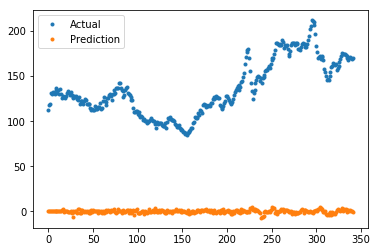

In [34]:
plt.plot(meat_y, '.')
plt.plot(regr.predict(rescaled), '.')
plt.legend(['Actual', 'Prediction'])

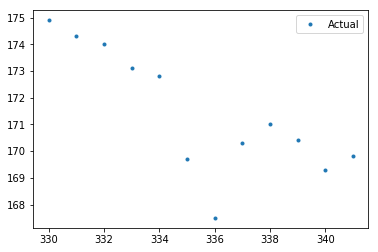

In [32]:
plt.plot(meat_y[-12:], '.');
#plt.plot(pipeline.predict(meat_X[-10:], to_scale=True), '.')
plt.legend(['Actual', 'Prediction']);


In [18]:
pipeline.predict(meat_X[-10:])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from tsfresh import extract_relevant_features
extracted_features = extract_relevant_features(tsfresh_data2, tsfresh_data2, column_id='variable')


In [12]:
# training set up to 2016
train = indexed_df.loc['1990':'2016']
test = indexed_df.loc['2017':'2018']

In [39]:
test.tail()

,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,Temperature
Date,,,,,,
2018-02-01,170.3,191.1,161.3,158.0,192.4,0.81
2018-03-01,171.0,197.4,165.4,156.8,185.5,0.91
2018-04-01,170.4,204.1,168.5,154.6,176.1,0.87
2018-05-01,169.3,215.2,172.6,150.6,175.3,0.82
2018-06-01,169.8,213.2,166.2,146.1,177.4,0.76


# Unsupervised learning

In [26]:
# trying pca woo
test_pca = PCA(n_components=3)
test_pca.fit(extracted_features)
test_pca.transform(extracted_features)

array([[-1.04221151e+05, -4.62528596e+05, -6.83804901e+03],
       [ 8.74211990e+05, -3.59700070e+05,  6.66161243e+04],
       [-1.66215922e+06, -8.38462307e+05, -3.31131400e+04],
       [-2.87006236e+05, -4.11288812e+05, -1.33943017e+04],
       [ 1.09092426e+07,  9.16457584e+05, -1.19653711e+04],
       [-9.73006800e+06,  1.15552220e+06, -1.30526249e+03]])

In [ ]:
# do some kind of unsupervised learning here

In [ ]:
# using tsfresh for feature generation, then PCA for unsupervised learning req

# Supervised Learning

In [15]:
from Capstone.models import modeling

In [16]:
# do forloop here
lags = [1, 2, 3]
integ = [1, 2]
mv_avg = [6, 9, 12]
target = ['Sugar Price Index', 'Meat Price Index',
          'Oils Price Index', 'Cereals Price Index', 'Dairy Price Index']
# lets do ARIMA here
for i in mv_avg:
    print(i)
    for j in integ:
        print(j)
        for k in lags:
            print(k)
            for l in target:
                print(l)
                modeling.ARIMAX_model(indexed_df, target=l, integ=j, ar=k, ma=i)

6
1
1
Sugar Price Index
Acceptance rate of Metropolis-Hastings is 0.0363
Acceptance rate of Metropolis-Hastings is 0.5049
Acceptance rate of Metropolis-Hastings is 0.39855

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.4009
Acceptance rate of Metropolis-Hastings is 0.30425
Normal ARIMA(1,1,6)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Sugar Price Index       Method: Metropolis Hastings                       
Start Date: 1990-07-01 00:00:00                         Unnormalized Log Posterior: -1351.4004            
End Date: 2018-06-01 00:00:00                           AIC: 2720.800821150366                            
Number of observations: 335                             BIC: 2755.1279959367916                           
Latent Variable                          Median        

Acceptance rate of Metropolis-Hastings is 0.02895
Acceptance rate of Metropolis-Hastings is 0.52155
Acceptance rate of Metropolis-Hastings is 0.42265
Acceptance rate of Metropolis-Hastings is 0.31635

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.303975
Normal ARIMA(1,1,6)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Dairy Price Index       Method: Metropolis Hastings                       
Start Date: 1990-07-01 00:00:00                         Unnormalized Log Posterior: -1067.339             
End Date: 2018-06-01 00:00:00                           AIC: 2152.678056366498                            
Number of observations: 335                             BIC: 2187.0052311529234                           
Latent Variable                          Median             Mean           

Acceptance rate of Metropolis-Hastings is 0.0019
Acceptance rate of Metropolis-Hastings is 0.4977
Acceptance rate of Metropolis-Hastings is 0.30785

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.44485
Acceptance rate of Metropolis-Hastings is 0.3418
Normal ARIMA(2,1,6)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Cereals Price Index     Method: Metropolis Hastings                       
Start Date: 1990-07-01 00:00:00                         Unnormalized Log Posterior: -1063.1612            
End Date: 2018-06-01 00:00:00                           AIC: 2146.3224374100723                           
Number of observations: 335                             BIC: 2184.463742728323                            
Latent Variable                          Median             Mean               

Acceptance rate of Metropolis-Hastings is 0.0069
Acceptance rate of Metropolis-Hastings is 0.62475
Acceptance rate of Metropolis-Hastings is 0.5703
Acceptance rate of Metropolis-Hastings is 0.4741
Acceptance rate of Metropolis-Hastings is 0.3374

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.35365
Normal ARIMA(3,1,6)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Oils Price Index        Method: Metropolis Hastings                       
Start Date: 1990-07-01 00:00:00                         Unnormalized Log Posterior: -1120.2447            
End Date: 2018-06-01 00:00:00                           AIC: 2262.4893471823007                           
Number of observations: 335                             BIC: 2304.4447830323766                           
Latent Variable               

Acceptance rate of Metropolis-Hastings is 0.0571
Acceptance rate of Metropolis-Hastings is 0.24445

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.075475
Acceptance rate of Metropolis-Hastings is 0.436
Acceptance rate of Metropolis-Hastings is 0.525
Acceptance rate of Metropolis-Hastings is 0.0052
Acceptance rate of Metropolis-Hastings is 0.04385
Acceptance rate of Metropolis-Hastings is 0.0731
Acceptance rate of Metropolis-Hastings is 0.154
Acceptance rate of Metropolis-Hastings is 0.1865
Acceptance rate of Metropolis-Hastings is 0.24555
Normal ARIMA(1,2,6)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Meat Price  Method: Metropolis Hastings                       
Start Date: 1990-07-01 00:00:00                         Unnormalized Log Posterior: -894.0783             

Acceptance rate of Metropolis-Hastings is 0.1999
Acceptance rate of Metropolis-Hastings is 0.27555

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.1542
Acceptance rate of Metropolis-Hastings is 0.25615
Normal ARIMA(2,2,6)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Sugar Price Method: Metropolis Hastings                       
Start Date: 1990-07-01 00:00:00                         Unnormalized Log Posterior: -1350.8747            
End Date: 2018-06-01 00:00:00                           AIC: 2721.7493643724342                           
Number of observations: 334                             BIC: 2759.860774302201                            
Latent Variable                          Median             Mean               95% Credibility Interval 
=======================

Acceptance rate of Metropolis-Hastings is 0.00155
Acceptance rate of Metropolis-Hastings is 0.01755
Acceptance rate of Metropolis-Hastings is 0.085
Acceptance rate of Metropolis-Hastings is 0.2063
Acceptance rate of Metropolis-Hastings is 0.27055

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.297075
Normal ARIMA(2,2,6)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Dairy Price Method: Metropolis Hastings                       
Start Date: 1990-07-01 00:00:00                         Unnormalized Log Posterior: -1062.2367            
End Date: 2018-06-01 00:00:00                           AIC: 2144.4734899352757                           
Number of observations: 334                             BIC: 2182.5848998650426                           
Latent Variable             

Acceptance rate of Metropolis-Hastings is 0.00375
Acceptance rate of Metropolis-Hastings is 0.024
Acceptance rate of Metropolis-Hastings is 0.12345
Acceptance rate of Metropolis-Hastings is 0.1609
Acceptance rate of Metropolis-Hastings is 0.19625
Acceptance rate of Metropolis-Hastings is 0.2368

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.250225
Normal ARIMA(3,2,6)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Cereals Pri Method: Metropolis Hastings                       
Start Date: 1990-07-01 00:00:00                         Unnormalized Log Posterior: -1056.2655            
End Date: 2018-06-01 00:00:00                           AIC: 2134.5309853809354                           
Number of observations: 334                             BIC: 2176.453536303679        

Acceptance rate of Metropolis-Hastings is 0.0638
Acceptance rate of Metropolis-Hastings is 0.3836

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.374425
Normal ARIMA(1,1,9)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Oils Price Index        Method: Metropolis Hastings                       
Start Date: 1990-10-01 00:00:00                         Unnormalized Log Posterior: -1107.0552            
End Date: 2018-06-01 00:00:00                           AIC: 2238.1104418689406                           
Number of observations: 332                             BIC: 2283.7720614959385                           
Latent Variable                          Median             Mean               95% Credibility Interval 
======================================== ================== ============

Acceptance rate of Metropolis-Hastings is 0.03005
Acceptance rate of Metropolis-Hastings is 0.5736
Acceptance rate of Metropolis-Hastings is 0.47875
Acceptance rate of Metropolis-Hastings is 0.3521

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.34525
Normal ARIMA(2,1,9)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Meat Price Index        Method: Metropolis Hastings                       
Start Date: 1990-10-01 00:00:00                         Unnormalized Log Posterior: -871.7699             
End Date: 2018-06-01 00:00:00                           AIC: 1769.5398728215443                           
Number of observations: 332                             BIC: 1819.0066274174587                           
Latent Variable                          Median             Mean              

Acceptance rate of Metropolis-Hastings is 0.44315
Acceptance rate of Metropolis-Hastings is 0.3229

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.317375
Normal ARIMA(2,1,9)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Dairy Price Index       Method: Metropolis Hastings                       
Start Date: 1990-10-01 00:00:00                         Unnormalized Log Posterior: -1051.7101            
End Date: 2018-06-01 00:00:00                           AIC: 2129.42016135976                             
Number of observations: 332                             BIC: 2178.8869159556743                           
Latent Variable                          Median             Mean               95% Credibility Interval 
======================================== ================== ===========

Acceptance rate of Metropolis-Hastings is 0.01365
Acceptance rate of Metropolis-Hastings is 0.1424
Acceptance rate of Metropolis-Hastings is 0.4958
Acceptance rate of Metropolis-Hastings is 0.2921

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.492375
Acceptance rate of Metropolis-Hastings is 0.3735
Normal ARIMA(3,1,9)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Oils Price Index        Method: Metropolis Hastings                       
Start Date: 1990-10-01 00:00:00                         Unnormalized Log Posterior: -1101.8042            
End Date: 2018-06-01 00:00:00                           AIC: 2231.6083242529985                           
Number of observations: 332                             BIC: 2284.8802138178294                           
Latent Variable              

Acceptance rate of Metropolis-Hastings is 0.0012
Acceptance rate of Metropolis-Hastings is 0.01155
Acceptance rate of Metropolis-Hastings is 0.0582
Acceptance rate of Metropolis-Hastings is 0.1425
Acceptance rate of Metropolis-Hastings is 0.1915
Acceptance rate of Metropolis-Hastings is 0.23275
Acceptance rate of Metropolis-Hastings is 0.30535

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.28495
Normal ARIMA(1,2,9)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Sugar Price Method: Metropolis Hastings                       
Start Date: 1990-10-01 00:00:00                         Unnormalized Log Posterior: -1335.3333            
End Date: 2018-06-01 00:00:00                           AIC: 2694.6665338373605                           
Number of observations: 331          

Acceptance rate of Metropolis-Hastings is 0.09395
Acceptance rate of Metropolis-Hastings is 0.0028
Acceptance rate of Metropolis-Hastings is 0.00715
Acceptance rate of Metropolis-Hastings is 0.0932
Acceptance rate of Metropolis-Hastings is 0.23995

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.24625
Normal ARIMA(1,2,9)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Cereals Pri Method: Metropolis Hastings                       
Start Date: 1990-10-01 00:00:00                         Unnormalized Log Posterior: -1047.4329            
End Date: 2018-06-01 00:00:00                           AIC: 2118.8657852835313                           
Number of observations: 331                             BIC: 2164.491205788056                            
Latent Variable             

Acceptance rate of Metropolis-Hastings is 0.00225
Acceptance rate of Metropolis-Hastings is 0.0239
Acceptance rate of Metropolis-Hastings is 0.115
Acceptance rate of Metropolis-Hastings is 0.1535
Acceptance rate of Metropolis-Hastings is 0.1887
Acceptance rate of Metropolis-Hastings is 0.24305

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.251575
Normal ARIMA(2,2,9)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Meat Price  Method: Metropolis Hastings                       
Start Date: 1990-10-01 00:00:00                         Unnormalized Log Posterior: -878.2522             
End Date: 2018-06-01 00:00:00                           AIC: 1782.5044686549465                           
Number of observations: 331                             BIC: 1831.9320075348483        

Acceptance rate of Metropolis-Hastings is 0.00015
Acceptance rate of Metropolis-Hastings is 0.0016
Acceptance rate of Metropolis-Hastings is 0.01955
Acceptance rate of Metropolis-Hastings is 0.08675
Acceptance rate of Metropolis-Hastings is 0.2117
Acceptance rate of Metropolis-Hastings is 0.26845

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.259675
Normal ARIMA(2,2,9)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Dairy Price Method: Metropolis Hastings                       
Start Date: 1990-10-01 00:00:00                         Unnormalized Log Posterior: -1049.665             
End Date: 2018-06-01 00:00:00                           AIC: 2125.33009661533                             
Number of observations: 331                             BIC: 2174.757635495232      

Acceptance rate of Metropolis-Hastings is 0.02125
Acceptance rate of Metropolis-Hastings is 0.3967

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.328775
Normal ARIMA(3,2,9)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Oils Price  Method: Metropolis Hastings                       
Start Date: 1990-10-01 00:00:00                         Unnormalized Log Posterior: -1106.5692            
End Date: 2018-06-01 00:00:00                           AIC: 2241.138494227566                            
Number of observations: 331                             BIC: 2294.368151482845                            
Latent Variable                          Median             Mean               95% Credibility Interval 
======================================== ================== ===========

Acceptance rate of Metropolis-Hastings is 0.07165
Acceptance rate of Metropolis-Hastings is 0.4021
Acceptance rate of Metropolis-Hastings is 0.29955

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.287325
Normal ARIMA(1,1,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Sugar Price Index       Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -1320.059             
End Date: 2018-06-01 00:00:00                           AIC: 2670.117948591767                            
Number of observations: 329                             BIC: 2727.0588148532474                           
Latent Variable                          Median             Mean               95% Credibility Interval 
=====================

Acceptance rate of Metropolis-Hastings is 0.0928
Acceptance rate of Metropolis-Hastings is 0.4533
Acceptance rate of Metropolis-Hastings is 0.3312

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.3387
Normal ARIMA(1,1,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Cereals Price Index     Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -1036.833             
End Date: 2018-06-01 00:00:00                           AIC: 2103.665968060959                            
Number of observations: 329                             BIC: 2160.6068343224397                           
Latent Variable                          Median             Mean               95% Credibility Interval 
=========================

Acceptance rate of Metropolis-Hastings is 0.04005
Acceptance rate of Metropolis-Hastings is 0.6334
Acceptance rate of Metropolis-Hastings is 0.5374
Acceptance rate of Metropolis-Hastings is 0.42425
Acceptance rate of Metropolis-Hastings is 0.3227

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.316
Normal ARIMA(2,1,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Meat Price Index        Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -844.7294             
End Date: 2018-06-01 00:00:00                           AIC: 1721.4587029584525                           
Number of observations: 329                             BIC: 1782.1956269706984                           
Latent Variable                

Acceptance rate of Metropolis-Hastings is 0.0052
Acceptance rate of Metropolis-Hastings is 0.6543
Acceptance rate of Metropolis-Hastings is 0.6042
Acceptance rate of Metropolis-Hastings is 0.49395
Acceptance rate of Metropolis-Hastings is 0.3388

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.359625
Normal ARIMA(2,1,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Dairy Price Index       Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -1039.3557            
End Date: 2018-06-01 00:00:00                           AIC: 2110.711374660317                            
Number of observations: 329                             BIC: 2171.448298672563                            
Latent Variable              

Acceptance rate of Metropolis-Hastings is 0.01515
Acceptance rate of Metropolis-Hastings is 0.3219

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.17835
Acceptance rate of Metropolis-Hastings is 0.2919
Normal ARIMA(3,1,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Oils Price Index        Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -1088.9115            
End Date: 2018-06-01 00:00:00                           AIC: 2211.823016377868                            
Number of observations: 329                             BIC: 2276.3559981408794                           
Latent Variable                          Median             Mean               95% Credibility Interval 
=======================

Acceptance rate of Metropolis-Hastings is 0.00095
Acceptance rate of Metropolis-Hastings is 0.0101
Acceptance rate of Metropolis-Hastings is 0.04485
Acceptance rate of Metropolis-Hastings is 0.22855
Acceptance rate of Metropolis-Hastings is 0.2831

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.28545
Normal ARIMA(1,2,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Differenced Sugar Price Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -1316.5915            
End Date: 2018-06-01 00:00:00                           AIC: 2663.183078705023                            
Number of observations: 328                             BIC: 2720.078282830785                            
Latent Variable             

Acceptance rate of Metropolis-Hastings is 5e-05
Acceptance rate of Metropolis-Hastings is 0.0005
Acceptance rate of Metropolis-Hastings is 0.0066
Acceptance rate of Metropolis-Hastings is 0.05925
Acceptance rate of Metropolis-Hastings is 0.1434
Acceptance rate of Metropolis-Hastings is 0.1829
Acceptance rate of Metropolis-Hastings is 0.24335

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.23275
Acceptance rate of Metropolis-Hastings is 0.30375
Normal ARIMA(1,2,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Differenced Cereals Pri Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -1034.5632            
End Date: 2018-06-01 00:00:00                           AIC: 2099.126441150318                  

Acceptance rate of Metropolis-Hastings is 0.00055
Acceptance rate of Metropolis-Hastings is 0.005
Acceptance rate of Metropolis-Hastings is 0.04965
Acceptance rate of Metropolis-Hastings is 0.2371

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.2429
Normal ARIMA(2,2,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Differenced Meat Price  Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -851.0501             
End Date: 2018-06-01 00:00:00                           AIC: 1734.100235614446                            
Number of observations: 328                             BIC: 1794.7884533485924                           
Latent Variable                          Median             Mean               9

Acceptance rate of Metropolis-Hastings is 0.00015
Acceptance rate of Metropolis-Hastings is 0.0024
Acceptance rate of Metropolis-Hastings is 0.0308
Acceptance rate of Metropolis-Hastings is 0.133
Acceptance rate of Metropolis-Hastings is 0.17725
Acceptance rate of Metropolis-Hastings is 0.2195
Acceptance rate of Metropolis-Hastings is 0.27945

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.29005
Normal ARIMA(2,2,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Differenced Dairy Price Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -1033.9321            
End Date: 2018-06-01 00:00:00                           AIC: 2099.864221999875                            
Number of observations: 328           

Acceptance rate of Metropolis-Hastings is 0.00065
Acceptance rate of Metropolis-Hastings is 0.0197
Acceptance rate of Metropolis-Hastings is 0.0415
Acceptance rate of Metropolis-Hastings is 0.23585

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.26135
Normal ARIMA(3,2,12)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Differenced Oils Price  Method: Metropolis Hastings                       
Start Date: 1991-01-01 00:00:00                         Unnormalized Log Posterior: -1087.661             
End Date: 2018-06-01 00:00:00                           AIC: 2209.3220164735935                           
Number of observations: 328                             BIC: 2273.803247816124                            
Latent Variable                          Median             Mean              

Best AIC scores for ARIMA come from autoregression 2, differenced 1, moving average 12. 
best AIC score for VAR are 2 lags, 1 difference.

In [18]:
params = {'lags': 2, 'diffs': 1, 'ma': 12}

In [13]:
pfarima_model = pf.ARIMA(data=train, target='Sugar Price Index', ar=2, ma=12, integ=1, family=pf.Normal())
#pfvar_model = pf.VAR(data=train, lags=2, integ=1)

In [14]:
pfarima_model.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.07275
Acceptance rate of Metropolis-Hastings is 0.41935
Acceptance rate of Metropolis-Hastings is 0.2919

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.292025


In [15]:
arima_yhat = pfarima_model.predict(h=12)
#var_yhat = pfvar_model.predict(h=3)

In [16]:
arima_yhat

,Differenced Sugar Price Index
Date,
2016-12-26,-17.634198
2017-01-26,-4.749363
2017-02-24,2.952545
2017-03-27,-3.322794
2017-04-26,3.420281
2017-05-27,8.708049
2017-06-26,4.755249
2017-07-27,2.968983
2017-08-27,4.872185


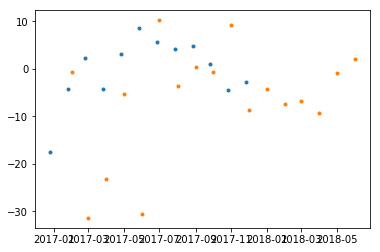

In [37]:
plt.plot(arima_yhat)
plt.plot(diff_test['Sugar Price Index'], '.')

In [33]:
diff_test = test.diff()

diff_test['Sugar Price Index']

Date
2017-01-01     NaN
2017-02-01    -0.6
2017-03-01   -31.4
2017-04-01   -23.2
2017-05-01    -5.4
2017-06-01   -30.6
2017-07-01    10.2
2017-08-01    -3.6
2017-09-01     0.3
2017-10-01    -0.7
2017-11-01     9.2
2017-12-01    -8.6
2018-01-01    -4.2
2018-02-01    -7.5
2018-03-01    -6.9
2018-04-01    -9.4
2018-05-01    -0.8
2018-06-01     2.1
Name: Sugar Price Index, dtype: float64

In [13]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [14]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = [0, 1, 2, 4, 6, 8, 10, 12]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(indexed_df['Meat Price Index'].values, p_values, d_values, q_values)


ARIMA(0, 0, 0) MSE=2164.167
ARIMA(0, 0, 1) MSE=619.085
ARIMA(0, 1, 0) MSE=19.771
ARIMA(0, 1, 1) MSE=17.933
ARIMA(0, 1, 2) MSE=16.319
ARIMA(0, 2, 0) MSE=18.010
ARIMA(0, 2, 1) MSE=21.501
ARIMA(1, 0, 0) MSE=19.715
ARIMA(1, 1, 0) MSE=17.204
ARIMA(1, 2, 0) MSE=17.513
ARIMA(1, 2, 1) MSE=18.573
ARIMA(1, 2, 2) MSE=18.845
ARIMA(2, 0, 0) MSE=17.094
ARIMA(2, 1, 0) MSE=16.380
ARIMA(2, 1, 1) MSE=16.935
ARIMA(2, 2, 0) MSE=19.910
ARIMA(2, 2, 1) MSE=17.311
ARIMA(4, 0, 0) MSE=16.679
ARIMA(4, 1, 0) MSE=16.054
ARIMA(4, 1, 1) MSE=16.366
ARIMA(4, 2, 0) MSE=21.529
ARIMA(4, 2, 1) MSE=16.516
ARIMA(6, 0, 0) MSE=15.763
ARIMA(6, 1, 0) MSE=15.952
ARIMA(6, 1, 1) MSE=15.922
ARIMA(6, 2, 0) MSE=21.485
ARIMA(6, 2, 1) MSE=16.397
ARIMA(8, 1, 0) MSE=15.737
ARIMA(8, 1, 1) MSE=15.882
ARIMA(8, 2, 0) MSE=19.093
ARIMA(8, 2, 1) MSE=16.700


# Forecasting

# Save Model